In [15]:
%matplotlib notebook

from scipy.stats import norm

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt

import numpy as np

import random

from IPython.display import display
# %matplotlib inline
# %matplotlib notebook

In [30]:
norm.ppf(.8,0,1)

0.8416212335729143

<IPython.core.display.Javascript object>


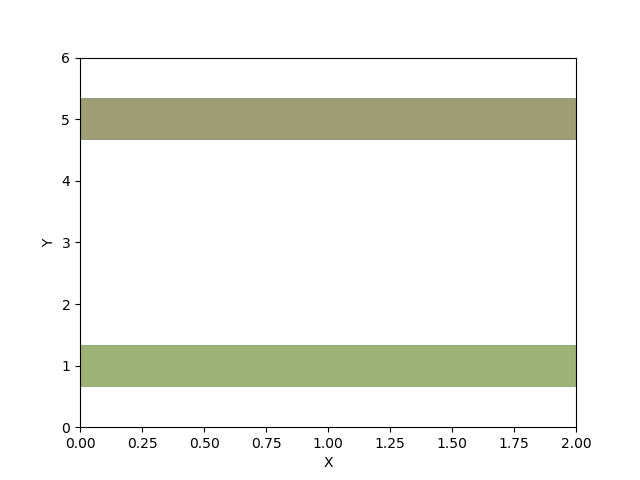

Button(description='Different', style=ButtonStyle())

Button(description='Same', style=ButtonStyle())

In [35]:


class Experiment:
    
    def __init__(self):
        self.responsedict = {'hit':0,'miss':0,'fa':0,'cr':0}
        self.setbasecolor()
        self.setaltcolor()
        self.l1 = np.full(10,5)
        self.l2 = np.full(10,1)


    def genimage(self):
        self.myline1 = self.axis.plot(self.l1, color=self.basecolor, linewidth = 30)
        self.myline2 = self.axis.plot(self.l2, color=self.altcolor, linewidth = 30)
        plt.show()
        

    

  
    def catchtrial(self, rate=0.5):
        return random.random() < rate
    
    def setbasecolor(self):
        self.basecolor = (random.random(),random.random(),random.random())
    
    def setaltcolor(self, magnitude=0.08):
        self.altcolor = list(i for i in self.basecolor)
        index = random.choice([0,1,2])
        editcolor = self.basecolor[index]
        if editcolor <= 1-magnitude:
            self.altcolor[index] += magnitude
        else:
            self.altcolor[index] -= magnitude
        self.altcolor = tuple(self.altcolor)
        
    def trial(self):
        self.catch = self.catchtrial()
        #print(self.catch)
        if self.catch:
            self.setbasecolor()
            self.altcolor = self.basecolor

        else:
            self.setbasecolor()
            self.setaltcolor()    
            
            
            
    def resp_no(self, ignore):
        #print(ignore)
        if self.catch:
            self.responsedict['cr'] += 1
        else:
            self.responsedict['miss'] += 1
        self.trial()
        self.genimage()
            
    def resp_yes(self, ignore):
        #print(ignore)
        if self.catch:
            self.responsedict['fa'] += 1
        else:
            self.responsedict['hit'] += 1
        self.trial()
        self.genimage()
        

        
ex = Experiment()

ex.figure,ex.axis = plt.subplots(1,1)
ex.axis.set_xlabel('X')
ex.axis.set_ylabel('Y')
ex.axis.set_xlim(0,2)
ex.axis.set_ylim(0,6)
        
ex.trial()
ex.genimage()



yesbutton = widgets.Button(description="Different")
display(yesbutton)
yesbutton.on_click(ex.resp_yes)

yesbutton = widgets.Button(description="Same")
display(yesbutton)
yesbutton.on_click(ex.resp_no)
        
        
        

In [38]:
def get_dprime(**respdict):
    hitrate = respdict['hit']/(respdict['hit'] + respdict['miss'])
    farate = respdict['fa']/(respdict['fa'] + respdict['cr'])
    zhit = norm.ppf(hitrate,0,1)
    zfa = norm.ppf(farate,0,1)
    
    return zhit-zfa

get_dprime(**ex.responsedict)

0.8160477657030253